# [PyTorch Tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data from https://www.python-course.eu/neural_network_mnist.php
train_data = np.loadtxt('mnist/train.csv', delimiter=',') 
test_data = np.loadtxt('mnist/test.csv', delimiter=',') 

trn_X = train_data[:, 1:]
trn_y = train_data[:, :1]
tst_X = test_data[:, 1:]
tst_y = test_data[:, :1]

(60000, 784)

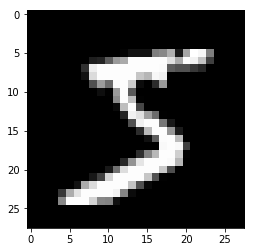

In [3]:
# Show an image
plt.imshow(trn_X[0].reshape(28, 28), cmap='gray')
trn_X.shape

## PyTorch

In [81]:
import torch

# Convert NumPy arrays to torch tensors
trn_X, trn_y, tst_X, tst_y = map(torch.tensor, (trn_X, trn_y, tst_X, tst_y))

trn_X = trn_X.type('torch.FloatTensor')
trn_y = trn_y.type('torch.FloatTensor')
tst_X = tst_X.type('torch.FloatTensor')
tst_y = tst_y.type('torch.FloatTensor')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [8]:
type(trn_X)

torch.Tensor

### Create a neural network from scratch

In [43]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
# trailing _'s in PyTorch signifies an in-place operation
weights.requires_grad_()
# bias: kind of like a coefficient added to each term
bias = torch.zeros(10, requires_grad=True)
weights

tensor([[ 0.0201, -0.0209,  0.0781,  ...,  0.0317, -0.0315, -0.0425],
        [ 0.0273,  0.0350, -0.0038,  ..., -0.0137,  0.0545, -0.0125],
        [-0.0016,  0.0514, -0.0170,  ...,  0.0225, -0.0059,  0.0116],
        ...,
        [ 0.0755, -0.0274,  0.0153,  ...,  0.0224,  0.0220,  0.0056],
        [ 0.0144,  0.0336,  0.0255,  ...,  0.0418,  0.0005,  0.0128],
        [ 0.0464, -0.0399,  0.0763,  ..., -0.0725, -0.0263, -0.0272]],
       requires_grad=True)

In [41]:
# 1 / (1 + e^(-x))
def sigmoid(x):
    return 1 / (1 + (-x).exp())

sigmoid(torch.tensor([0.0, 1.0]))

tensor([0.5000, 0.7311])

In [45]:
# Model for learning
def model(batch):
    return sigmoid(batch @ weights + bias)
# Note: @ is the dot product operation

In [46]:
# Check to make sure dimensions line up
trn_X.shape, weights.shape

(torch.Size([60000, 784]), torch.Size([784, 10]))

In [86]:
batch_size = 64

batch = trn_X[0:batch_size]
predictions = model(batch)
predictions[0], predictions.shape

(tensor([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.4507e-18, 2.9945e-24, 1.0000e+00,
         7.2961e-26, 4.9396e-06, 1.0000e+00, 3.8078e-29],
        grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [87]:
# Next steps: log function, accuracy